### Import necessary modules

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd


#df_original = vv.dataset_modelling_version(iteration_code="0001_20220620")
#df_original = vv.dataset_modelling_version(iteration_code="0012_20220704")
df = vv.dataset_modelling_version(iteration_code="0013_20220704")
print(df.shape)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:275: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 28454/38120/32252/32637 ==> 28454/28643/28438/28448
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'borough_name_Barking and Dagenham',
       'borough_name_Barnet', 'borough_name_Brent', 'borough_name_Bromley',
       'borough_name_Camden', 'borough_name_City of London',
       'borough_name_Croydon', 'borough_name_Ealing', 'borough_name_Enfield',
       'borough_name_Greenwich', 'borough_name_Hackney',
       'borough_name_Hammersmith and Fulham', 'borough_name_Haringey',
       'borough_name_Harrow', 'borough_name_Havering',
       'borough_name_Hillingdon', 'borough_name_Hounslow',
       'borough_name_Islington', 'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_London (all)',
       'borough_name_Mer

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
122433527,550000.0,51.554388,0.082246,0.6,3.0,1.0,18.0,20220414.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
120753860,600000.0,51.604320,0.045740,0.5,3.0,1.0,18.0,20220307.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
124647602,600000.0,51.570780,0.116530,0.4,4.0,2.0,21.0,20220704.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
120756014,600000.0,51.569990,0.075861,0.6,4.0,1.0,32.0,20220307.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
122575517,600000.0,51.610161,0.026467,0.4,3.0,2.0,15.0,20220419.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124700522,550000.0,51.561740,0.094040,0.2,3.0,1.0,15.0,20220706.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
85617795,600000.0,51.611738,0.114882,1.0,4.0,1.0,30.0,20220611.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
121967948,600000.0,51.595780,0.076260,0.6,3.0,2.0,25.0,20220405.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
120319745,600000.0,51.605000,0.037400,0.2,3.0,1.0,14.0,20220224.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0


(24646, 96)


array([[ 1.31594004,  0.41622626,  1.27944585, ...,  1.99979715,
        -1.30783661, -0.34489177],
       [ 1.74022504,  1.07015063,  1.06054292, ...,  1.99979715,
        -1.30783661, -0.34489177],
       [ 1.74022504,  0.63090078,  1.48502488, ...,  1.99979715,
        -1.30783661, -0.34489177],
       ...,
       [ 1.65536804,  0.68134772,  1.26714732, ...,  1.99979715,
        -1.30783661, -0.34489177],
       [ 1.65536804,  0.66963963,  0.89132578, ..., -0.50005072,
         0.76462151, -0.34489177],
       [ 1.69779654,  1.13605121,  1.03114279, ...,  1.99979715,
        -1.30783661, -0.34489177]])

### Get the property listings data and store in a dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24650 entries, 122433527 to 97494416
Data columns (total 96 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Price                                               24650 non-null  float64
 1   location.latitude                                   24650 non-null  float64
 2   location.longitude                                  24650 non-null  float64
 3   distance_to_any_train                               24650 non-null  float64
 4   bedrooms_model                                      23553 non-null  float64
 5   bathrooms_model                                     24650 non-null  float64
 6   analyticsProperty.imageCount                        24649 non-null  float64
 7   analyticsProperty.added                             24649 non-null  float64
 8   floorplan_count                                     24650 non-null  fl

In [6]:
df[
    #['Address', 'analyticsProperty.maxSizeAc', 'analyticsProperty.maxSizeFt', 'analyticsProperty.minSizeAc', 'analyticsProperty.minSizeFt', 'date_scraped', 'date_scraped_model',     'date_scraped_model', 'date_scraped_meta']]
    #df['location.latitude'].notnull()]
    df['location.latitude'].isnull()]

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [7]:
#df.loc[123715148]

In [8]:
print(df.shape)
df["location.latitude"] = pd.to_numeric(df["location.latitude"], 'coerce').dropna().astype(int)
df["analyticsProperty.imageCount"] = pd.to_numeric(df["analyticsProperty.imageCount"], 'coerce').dropna().astype(int)
df["analyticsProperty.added"] = pd.to_numeric(df["analyticsProperty.added"], 'coerce').dropna().astype(int)
print(df.shape)
df.info()

(24650, 96)
(24650, 96)
<class 'pandas.core.frame.DataFrame'>
Index: 24650 entries, 122433527 to 97494416
Data columns (total 96 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Price                                               24650 non-null  float64
 1   location.latitude                                   24650 non-null  int64  
 2   location.longitude                                  24650 non-null  float64
 3   distance_to_any_train                               24650 non-null  float64
 4   bedrooms_model                                      23553 non-null  float64
 5   bathrooms_model                                     24650 non-null  float64
 6   analyticsProperty.imageCount                        24649 non-null  float64
 7   analyticsProperty.added                             24649 non-null  float64
 8   floorplan_count                               

In [9]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
123298463,600000.0,51,0.060760,0.3,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
121986209,600000.0,51,-0.090230,0.1,NaN,1.0,10.0,20220405.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
122862011,599950.0,51,-0.156021,0.3,NaN,1.0,10.0,20220426.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
124081757,550000.0,51,-0.170326,0.1,NaN,1.0,9.0,20220620.0,4.0,0,...,0,0,0,1,0,0,0,0,0,0
69820884,599000.0,51,-0.149116,0.4,NaN,1.0,12.0,20200420.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124159856,595000.0,51,-0.137085,0.1,NaN,1.0,9.0,20220621.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
74525460,595000.0,51,-0.150652,0.2,NaN,1.0,7.0,20201021.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
88574620,570000.0,51,-0.148559,0.5,NaN,1.0,11.0,20210125.0,9.0,0,...,0,0,0,0,0,0,0,0,1,0
96592495,550000.0,51,-0.192257,0.2,NaN,1.0,6.0,20220524.0,4.0,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
median_bathroom = df['bathrooms_model'].median()
print(median_bathroom)

df['bathrooms_model'].fillna(median_bathroom, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

1.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
123298463,600000.0,51,0.060760,0.3,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
121986209,600000.0,51,-0.090230,0.1,NaN,1.0,10.0,20220405.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
122862011,599950.0,51,-0.156021,0.3,NaN,1.0,10.0,20220426.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
124081757,550000.0,51,-0.170326,0.1,NaN,1.0,9.0,20220620.0,4.0,0,...,0,0,0,1,0,0,0,0,0,0
69820884,599000.0,51,-0.149116,0.4,NaN,1.0,12.0,20200420.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124159856,595000.0,51,-0.137085,0.1,NaN,1.0,9.0,20220621.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
74525460,595000.0,51,-0.150652,0.2,NaN,1.0,7.0,20201021.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
88574620,570000.0,51,-0.148559,0.5,NaN,1.0,11.0,20210125.0,9.0,0,...,0,0,0,0,0,0,0,0,1,0
96592495,550000.0,51,-0.192257,0.2,NaN,1.0,6.0,20220524.0,4.0,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
median_bedrooms = df['bedrooms_model'].median()
print(median_bedrooms)

df['bedrooms_model'].fillna(median_bedrooms, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

2.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
123298463,600000.0,51,0.06076,0.3,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
median_imageCount = df['analyticsProperty.imageCount'].median()
print(median_imageCount)

df['analyticsProperty.imageCount'].fillna(median_imageCount, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

11.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
123298463,600000.0,51,0.06076,0.3,3.0,1.0,11.0,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
median_added = df['analyticsProperty.added'].median()
print(median_added)

df['analyticsProperty.added'].fillna(median_added, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

20220324.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [14]:
#df = df['Price'].dropna()
#sample_incomplete_rows = df[df.isnull().any(axis=1)].copy() #.head()
#sample_incomplete_rows
df = df.dropna(subset="Price")
df = df.dropna(subset=["analyticsProperty.added", 'location.latitude', 'location.longitude'])

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [15]:
df.isnull().any() == True

Price                                                 False
location.latitude                                     False
location.longitude                                    False
distance_to_any_train                                 False
bedrooms_model                                        False
bathrooms_model                                       False
analyticsProperty.imageCount                          False
analyticsProperty.added                               False
floorplan_count                                       False
borough_name_Barking and Dagenham                     False
borough_name_Barnet                                   False
borough_name_Brent                                    False
borough_name_Bromley                                  False
borough_name_Camden                                   False
borough_name_City of London                           False
borough_name_Croydon                                  False
borough_name_Ealing                     

## Prepare data for training the model

In [16]:
df_values = vv.scale_dataset(df)
print(df.shape)
df_values[:20]
del df

(24650, 96)


In [23]:
#y = df['Price']
y = df_values[:,0]
#X = df.drop(['Price'], axis=1)
X = df_values[:,1:]
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
## Build a Random Forest model

(24650, 95) (24650,)


In [24]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import LinearSVR
#regressor = LinearSVR(epsilon=1.5,)
from sklearn.svm import SVR
regressor = SVR(epsilon=0.1,kernel='poly',degree=2,C=100)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Evaluate the model on the test data

In [25]:
print(type(y_test.values))
print(type(y_pred))


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [27]:
metrics.mean_squared_error(y_test, y_pred)

22.420567015004018

##

In [28]:
#metrics.accuracy_score(y_test.values, y_pred)
regressor.score(X_test, y_test)
#regressor.score(X, y)

-21.616753041673686

In [29]:
sorted(zip(y_test,y_pred),reverse=True)

[(1.7396564422978382, 3.0010318881912164),
 (1.7396564422978382, 2.7783452081313245),
 (1.7396564422978382, 2.209428225137378),
 (1.7396564422978382, 2.0132669355440496),
 (1.7396564422978382, 2.008937914580873),
 (1.7396564422978382, 1.9295845203802795),
 (1.7396564422978382, 1.8872828793177954),
 (1.7396564422978382, 1.8790775875527919),
 (1.7396564422978382, 1.8601066637536674),
 (1.7396564422978382, 1.8064330419360957),
 (1.7396564422978382, 1.777245619479352),
 (1.7396564422978382, 1.7033001625120372),
 (1.7396564422978382, 1.6531477596749242),
 (1.7396564422978382, 1.6190336795758897),
 (1.7396564422978382, 1.6148563405819703),
 (1.7396564422978382, 1.5863663929701461),
 (1.7396564422978382, 1.560785737179019),
 (1.7396564422978382, 1.528482025521153),
 (1.7396564422978382, 1.4663421718774519),
 (1.7396564422978382, 1.4559374589069014),
 (1.7396564422978382, 1.3218326842629275),
 (1.7396564422978382, 1.3181840323628782),
 (1.7396564422978382, 1.2360396503494855),
 (1.739656442297

In [30]:
y_pred = regressor.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True),columns=['actual','predicted'])
true_vs_pred

,actual,predicted
0,1.739656,3.001032
1,1.739656,2.778345
2,1.739656,2.209428
3,1.739656,2.013267
4,1.739656,2.008938
5,1.739656,1.929585
6,1.739656,1.887283
7,1.739656,1.879078
8,1.739656,1.860107
9,1.739656,1.806433


In [31]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

22.420567015004018

<AxesSubplot:xlabel='actual', ylabel='predicted'>

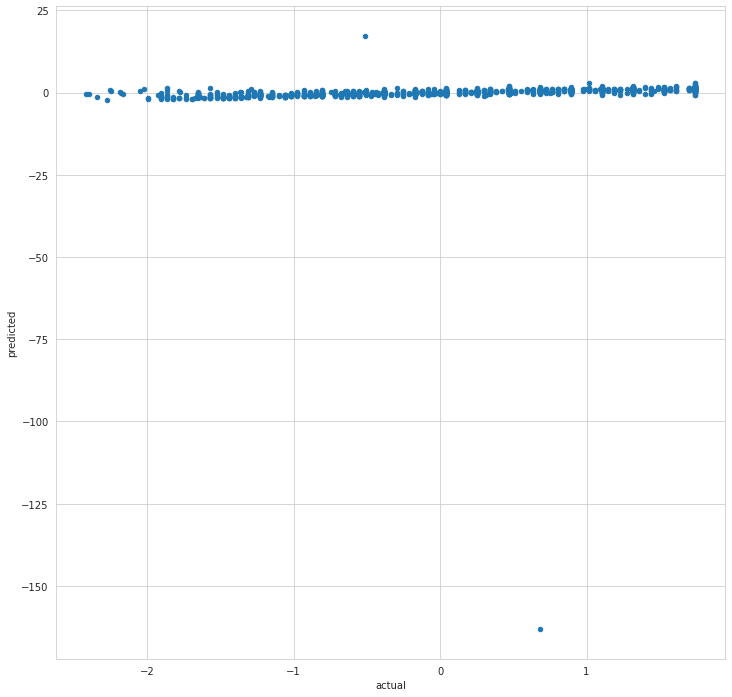

In [32]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))